Importing Dependencies

In [97]:
import warnings
import pandas as pd 
import numpy as np
import os
print('Subjects in Dataset (considered)')
print(os.listdir("/home/divyansh/Documents/Project/leapGestRecog"))
warnings.filterwarnings('ignore')


Subjects in Dataset (considered)
['00', '02', '01']


In [98]:
import json
import codecs
import os
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from PIL import Image
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display
path = '/home/divyansh/Documents/Project/leapGestRecog'
folders = os.listdir(path)
folders = set(folders)


different_classes = os.listdir(path+'/'+'00')
different_classes = set(different_classes)


print("The different classes that exist in this hand gesture recognition dataset are - ")
print(different_classes, sep='\n')


The different classes that exist in this hand gesture recognition dataset are - 
{'09_c', '08_palm_moved', '07_ok', '02_l', '10_down', '05_thumb', '01_palm', '06_index', '04_fist_moved', '03_fist'}


Processing Input

In [99]:
import cv2
x = []
z = []
y = []  # converting image to B/W
threshold = 200


for i in folders:
    print('***', i, '***')
    subject = path+'/'+i
    subdir = os.listdir(subject)
    subdir = set(subdir)
    for j in subdir:
        print(j)
        images = os.listdir(subject+'/'+j)
        for k in images:
            results = dict()
            results['y'] = j.split('_')[0]
            img = cv2.imread(subject+'/'+j+'/'+k, 0)
            img = cv2.resize(img, (int(160), int(60)))

            ret, imgf = cv2.threshold(
                img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgD = np.asarray(img, dtype=np.float64)
            z.append(imgD)
            imgf = np.asarray(imgf, dtype=np.float64)
            x.append(imgf)
            y.append(int(j.split('_')[0]))
            results['x'] = imgf

print(list(set(y)))



*** 00 ***
09_c
08_palm_moved
07_ok
02_l
10_down
05_thumb
01_palm
06_index
04_fist_moved
03_fist
*** 01 ***
09_c
08_palm_moved
07_ok
02_l
10_down
05_thumb
01_palm
06_index
04_fist_moved
03_fist
*** 02 ***
09_c
08_palm_moved
07_ok
02_l
10_down
05_thumb
01_palm
06_index
04_fist_moved
03_fist
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Class Label - 1


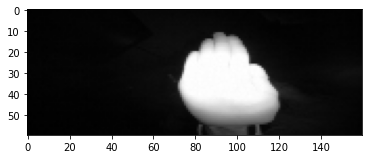

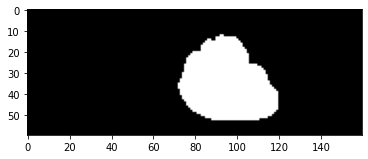

Class Label - 2


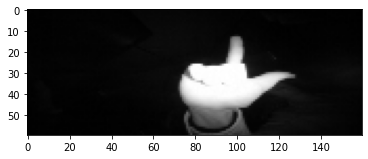

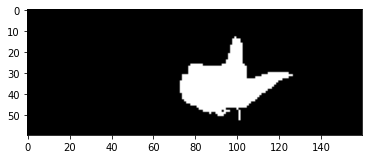

Class Label - 3


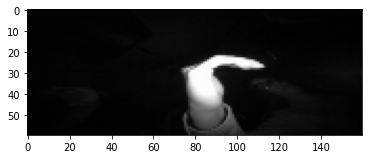

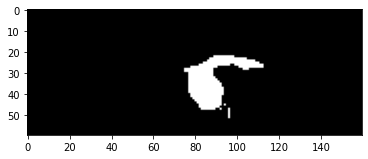

Class Label - 4


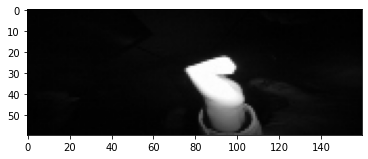

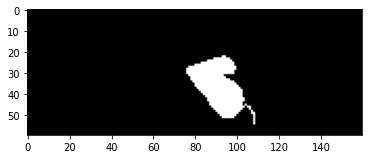

Class Label - 5


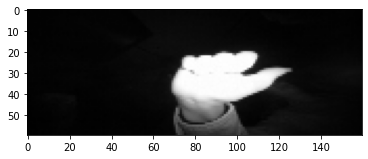

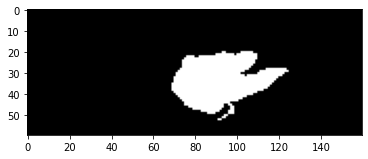

Class Label - 6


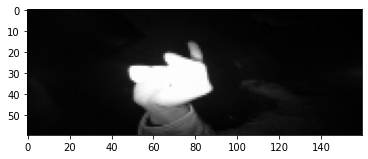

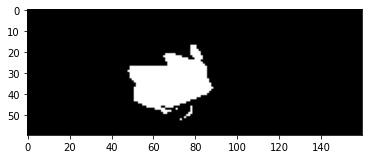

Class Label - 7


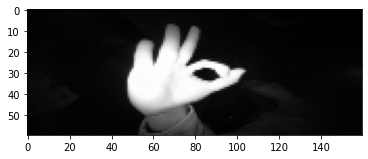

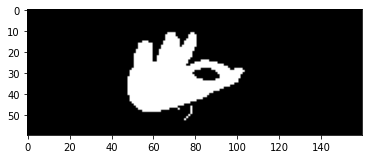

Class Label - 8


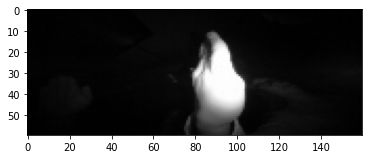

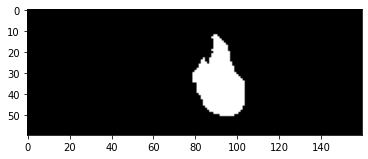

Class Label - 9


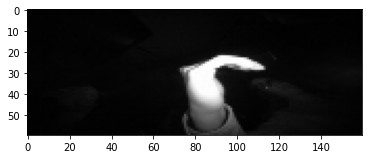

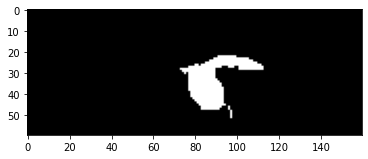

Class Label - 10


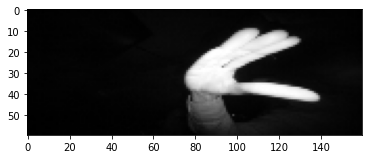

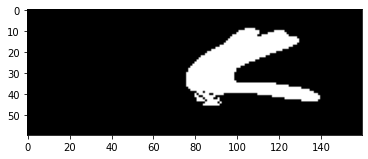

In [100]:
#sample black and white image from each class
l = []
list_names = []
for i in range(10):
    l.append(0)
for i in range(len(x)):
    if(l[y[i] - 1] == 0):
        l[y[i] - 1] = i
        if(len(np.unique(l)) == 10):
            break
for i in range(len(l)):
    %matplotlib inline
    print("Class Label - " + str(i + 1))
    plt.imshow(np.asarray(z[l[i]]), cmap  =cm.gray)
    plt.show()
    plt.imshow(np.asarray(x[l[i]]), cmap = cm.gray)     
    plt.show()

In [101]:
x=np.array(x)
y=np.array(y)
y = y.reshape(len(x), 1)
print('Input Dimension - ')
print(x.shape)
print('Output Dimension - ')
print(y.shape)
print(max(y),min(y))

Input Dimension - 
(6000, 60, 160)
Output Dimension - 
(6000, 1)
[10] [1]


In [102]:
x_data = x.reshape((len(x), 60, 160, 1))

x_data/=255
x_data=list(x_data)
for i in range(len(x_data)):
    x_data[i]=x_data[i].flatten()

In [103]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x_data = np.array(x_data)
x_data = pca.fit_transform(x_data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.31600485 0.1122178  0.0571044  0.03899072]
[863.28545705 514.44438505 366.97994382 303.24119406]


Train Test Split

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y,test_size = 0.2)

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_further)


Logistic Regression Classifier

In [106]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver = 'lbfgs')
logistic.fit(X_train, y_train)
y_pred_logistic=logistic.predict(X_test)
y_train_score_logistic=logistic.predict(X_train)
print("Accuracy of the Logistic Regression model is:\nTest ", accuracy_score(y_further, y_pred_logistic, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_logistic, normalize=True, sample_weight=None))

Accuracy of the Logistic Regression model is:
Test  0.42833333333333334
Train 0.42270833333333335


In [107]:
pd.DataFrame(confusion_matrix(y_further, y_pred_logistic),
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)",
                      "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])


,Predicted Thumb Down,Predicted Palm (H),Predicted L,Predicted Fist (H),Predicted Fist (V),Predicted Thumbs up,Predicted Index,Predicted OK,Predicted Palm (V),Predicted C
Actual Thumb Down,84,1,0,0,23,4,0,1,0,0
Actual Palm (H),1,81,1,0,3,21,0,0,16,6
Actual L,10,21,18,39,22,0,0,0,0,3
Actual Fist (H),0,0,0,39,0,2,0,37,15,13
Actual Fist (V),41,18,1,0,37,23,0,0,0,0
Actual Thumbs up,0,38,26,0,25,0,0,0,35,0
Actual Index,25,0,1,0,17,0,81,0,0,0
Actual OK,0,0,0,16,0,0,0,104,0,0
Actual Palm (V),0,5,19,35,0,21,0,2,46,2
Actual C,4,21,1,5,8,14,0,0,44,24


Stochastic Gradient Descent optimization

In [108]:
from sklearn.linear_model import SGDClassifier
sgd= SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test) 
y_train_score_sgd=sgd.predict(X_train)
print("Accuracy of the Stochastic Gradient Descent model is:\nTest ", accuracy_score(y_further, y_pred_sgd, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_sgd, normalize=True, sample_weight=None))

Accuracy of the Stochastic Gradient Descent model is:
Test  0.36916666666666664
Train 0.37041666666666667


In [109]:
pd.DataFrame(confusion_matrix(y_further, y_pred_sgd),
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)",
                      "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])


,Predicted Thumb Down,Predicted Palm (H),Predicted L,Predicted Fist (H),Predicted Fist (V),Predicted Thumbs up,Predicted Index,Predicted OK,Predicted Palm (V),Predicted C
Actual Thumb Down,101,7,0,0,4,0,0,1,0,0
Actual Palm (H),31,36,0,15,0,47,0,0,0,0
Actual L,32,20,0,0,0,60,0,0,1,0
Actual Fist (H),2,1,0,22,0,0,0,75,3,3
Actual Fist (V),69,17,0,0,0,0,0,0,34,0
Actual Thumbs up,14,24,0,0,19,32,0,0,35,0
Actual Index,48,0,0,0,0,18,58,0,0,0
Actual OK,0,0,0,0,0,0,0,120,0,0
Actual Palm (V),0,22,0,5,2,23,0,19,59,0
Actual C,12,26,0,24,0,23,0,1,20,15


K Neighbours Classifier

In [110]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [111]:
y_pred_knn = classifier.predict(X_test)

y_train_score_knn=classifier.predict(X_train)

In [112]:
from sklearn.metrics import accuracy_score
print("Accuracy of the K Neighbours model is:\nTest ", accuracy_score(y_further, y_pred_knn, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_knn, normalize=True, sample_weight=None))

Accuracy of the K Neighbours model is:
Test  0.99
Train 0.9922916666666667


In [113]:
pd.DataFrame(confusion_matrix(y_further, y_pred_knn),
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)",
                      "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])


,Predicted Thumb Down,Predicted Palm (H),Predicted L,Predicted Fist (H),Predicted Fist (V),Predicted Thumbs up,Predicted Index,Predicted OK,Predicted Palm (V),Predicted C
Actual Thumb Down,110,2,0,0,0,1,0,0,0,0
Actual Palm (H),0,127,2,0,0,0,0,0,0,0
Actual L,0,2,111,0,0,0,0,0,0,0
Actual Fist (H),0,2,0,103,0,0,0,1,0,0
Actual Fist (V),0,0,0,0,120,0,0,0,0,0
Actual Thumbs up,0,0,1,0,0,123,0,0,0,0
Actual Index,0,0,0,0,0,0,124,0,0,0
Actual OK,0,0,0,0,0,0,0,120,0,0
Actual Palm (V),0,0,0,0,0,0,0,0,130,0
Actual C,0,0,0,0,1,0,0,0,0,120


Decision Tree

In [114]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)


In [115]:
y_pred_dt=clf.predict(X_test)
y_train_score_dt=clf.predict(X_train)

In [116]:
print("Accuracy of the Decision Tree model is:\nTest ", accuracy_score(y_further, y_pred_dt, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_dt, normalize=True, sample_weight=None))

Accuracy of the Decision Tree model is:
Test  0.9183333333333333
Train 0.9239583333333333


In [117]:
pd.DataFrame(confusion_matrix(y_further, y_pred_dt),
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)",
                      "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])


,Predicted Thumb Down,Predicted Palm (H),Predicted L,Predicted Fist (H),Predicted Fist (V),Predicted Thumbs up,Predicted Index,Predicted OK,Predicted Palm (V),Predicted C
Actual Thumb Down,95,1,17,0,0,0,0,0,0,0
Actual Palm (H),0,121,2,0,0,0,0,0,0,6
Actual L,0,3,107,0,0,0,0,0,2,1
Actual Fist (H),0,0,0,101,0,0,0,1,0,4
Actual Fist (V),0,1,0,0,112,5,2,0,0,0
Actual Thumbs up,0,15,7,0,0,101,0,0,1,0
Actual Index,0,1,0,0,1,3,119,0,0,0
Actual OK,0,0,0,2,0,0,0,118,0,0
Actual Palm (V),2,1,0,1,0,1,0,0,125,0
Actual C,0,13,0,0,0,4,0,0,1,103


Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
clf_rft = RandomForestClassifier(
    n_estimators=100, max_depth=15, random_state=0)
clf_rft = clf_rft.fit(X_train, y_train)


In [119]:
y_pred_rft=clf_rft.predict(X_test)
y_train_score_rft=clf_rft.predict(X_train)

In [120]:
print("Accuracy of the Random Forest model is:\nTest ", accuracy_score(y_further, y_pred_rft, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_rft, normalize=True, sample_weight=None))

Accuracy of the Random Forest model is:
Test  0.9941666666666666
Train 1.0


In [121]:
pd.DataFrame(confusion_matrix(y_further, y_pred_rft),
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)",
                      "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])


,Predicted Thumb Down,Predicted Palm (H),Predicted L,Predicted Fist (H),Predicted Fist (V),Predicted Thumbs up,Predicted Index,Predicted OK,Predicted Palm (V),Predicted C
Actual Thumb Down,110,0,2,0,0,1,0,0,0,0
Actual Palm (H),0,129,0,0,0,0,0,0,0,0
Actual L,0,1,112,0,0,0,0,0,0,0
Actual Fist (H),0,0,0,106,0,0,0,0,0,0
Actual Fist (V),0,0,0,0,120,0,0,0,0,0
Actual Thumbs up,0,0,1,0,0,122,0,0,1,0
Actual Index,0,0,0,0,0,0,124,0,0,0
Actual OK,0,0,0,0,0,0,0,120,0,0
Actual Palm (V),1,0,0,0,0,0,0,0,129,0
Actual C,0,0,0,0,0,0,0,0,0,121


ANN based Classifier

In [122]:
from sklearn.neural_network import MLPClassifier

ann_clf = MLPClassifier()
ann_clf.fit(X_train, y_train)
y_pred_ann=ann_clf.predict(X_test)
y_train_score_ann=ann_clf.predict(X_train)
print("Accuracy of the MLP model is:\nTest ", accuracy_score(y_further, y_pred_ann, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_ann, normalize=True, sample_weight=None))

Accuracy of the MLP model is:
Test  0.9833333333333333
Train 0.978125


In [123]:
# H = Horizontal
# V = Vertical
pd.DataFrame(confusion_matrix(y_further, y_pred_ann),
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)",
                      "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])


,Predicted Thumb Down,Predicted Palm (H),Predicted L,Predicted Fist (H),Predicted Fist (V),Predicted Thumbs up,Predicted Index,Predicted OK,Predicted Palm (V),Predicted C
Actual Thumb Down,108,2,0,0,1,2,0,0,0,0
Actual Palm (H),0,128,0,0,1,0,0,0,0,0
Actual L,0,4,109,0,0,0,0,0,0,0
Actual Fist (H),0,2,0,103,0,0,0,1,0,0
Actual Fist (V),0,0,0,0,120,0,0,0,0,0
Actual Thumbs up,0,0,1,0,1,120,1,0,1,0
Actual Index,0,0,0,0,0,0,124,0,0,0
Actual OK,0,0,0,1,0,0,0,119,0,0
Actual Palm (V),0,0,0,0,0,0,0,0,129,1
Actual C,0,0,0,0,0,1,0,0,0,120
